4.9 (pt. 3)

## Outline

1. Outline

2. Import

    2.1 Inqusition

    2.2 Creating a Random Sample

3. Basic Charts

    3.1 Bar

    3.2 Line

    3.3 Histogram

4. Histogram of Order_Hour_of_Day

5. Bar Chart of Loyalty_Flag

6. Checking Expenditures Comparisent

7. Exploratory Analysis of Customer Demographics

8. Scatterplot between Age and Spending Power

9. Export

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
poc = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/poc.pkl')

In [3]:
poc.shape

(30629741, 28)

### Inqusition

In [4]:
#Ended up fixing errors in the data

In [5]:
poc['prices'].describe()

count    3.062974e+07
mean     1.191679e+01
std      4.913739e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [6]:
#This max is skewing our histogram and is incorect. Next lines will focus on removing it.

In [7]:
poc.loc[poc['prices'] >100, 'prices'] = np.nan

In [8]:
poc['prices'].describe()

count    3.062496e+07
mean     7.791916e+00
std      4.242307e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [9]:
poc_1 = poc[:1000000]

### Creating a Random Sample

In [10]:
np.random.seed(4)

In [11]:
dev = np.random.rand(len(poc)) <= 0.7

In [12]:
big = poc[dev]
small = poc[~dev]

In [13]:
len(big)+len(small)

30629741

In [14]:
poc.shape

(30629741, 28)

## Basic Charts

In [15]:
poc.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,order_freq,order_freq_flag,first_name,last_name,gender,state,age,n_dependants,martial_status,income
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


### Bar Chart

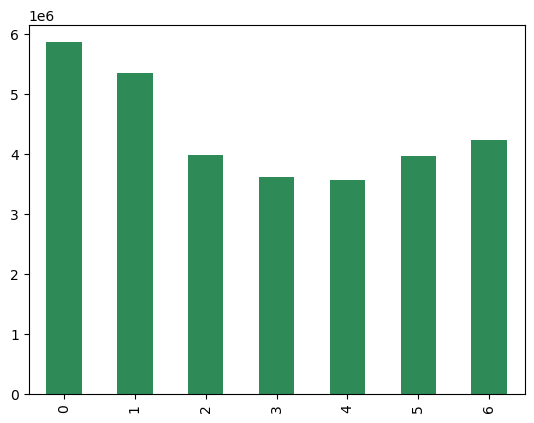

In [16]:
bar = poc['order_dow'].value_counts().sort_index().plot.bar(color = ['seagreen'])

### Histogram

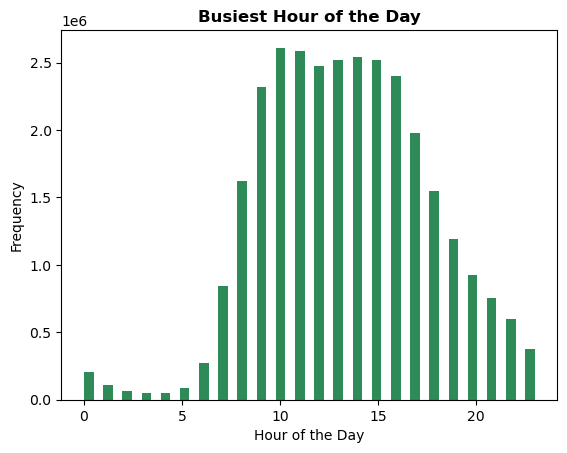

In [17]:
busiest_hours = poc['order_hour_of_day'].plot.hist(bins = 47, color = ['seagreen'])
plt.title('Busiest Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')
plt.show()

### Line Chart

In [18]:
df_2 = small[['order_dow','prices']]

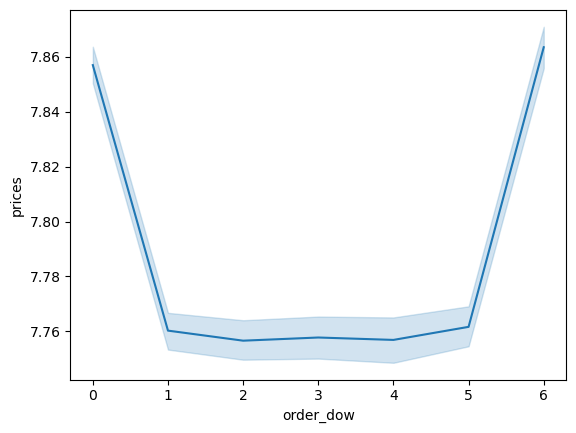

In [19]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [20]:
df_3 = small[['order_hour_of_day','prices']]

In [21]:
df_3.head(3)

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0


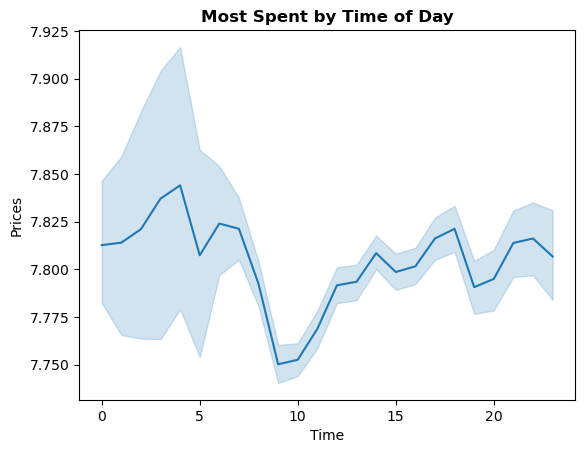

In [22]:
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')
plt.title('Most Spent by Time of Day', fontweight = 'bold')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show()

## Histogram of Order_Hour_of_Day

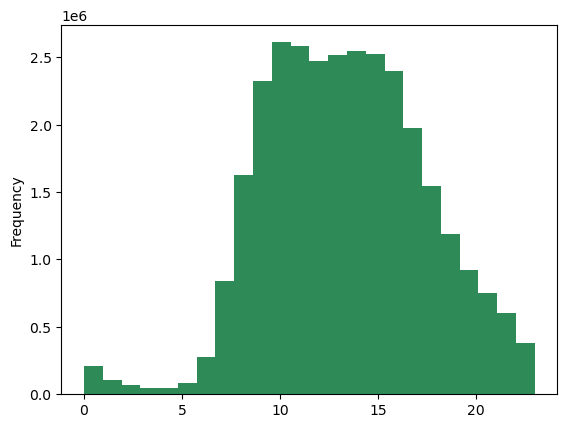

In [23]:
hist_1 = poc['order_hour_of_day'].plot.hist(bins = 24, color = ['seagreen'])

## Bar Chart of Loyalty_Flag

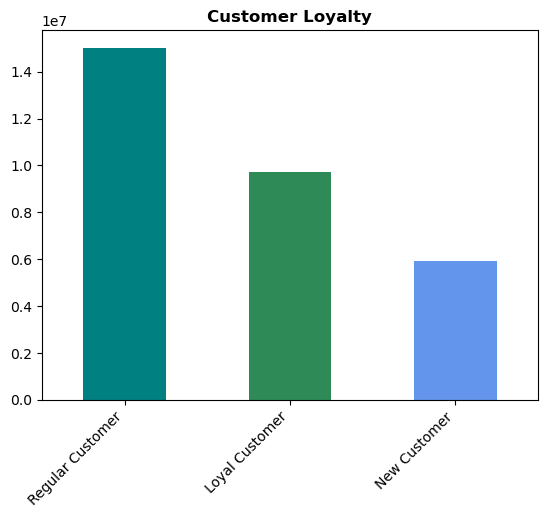

In [24]:
customer_loyalty_bar = poc['loyalty_flag'].value_counts().plot.bar(color = ['teal', 'seagreen', 'cornflowerblue'])
plt.title('Customer Loyalty', fontweight = 'bold')
plt.xticks(rotation=45, ha='right')
plt.show()

## Exploratory Analysis of Customer Demographics

In [25]:
df_3 = small[['age','n_dependants']]

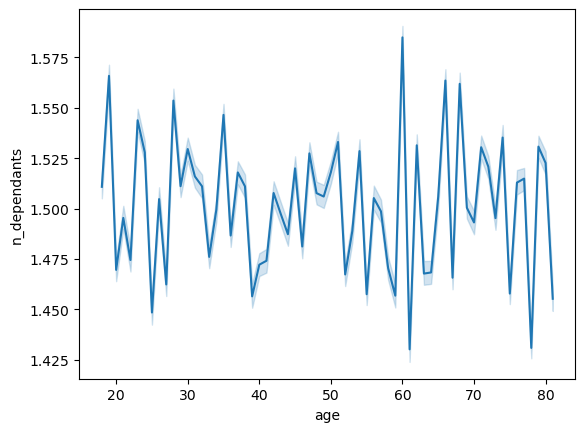

In [26]:
ep = sns.lineplot(data = df_3, x = 'age',y = 'n_dependants')

In [27]:
#Shows limited relation between age and number of dependants

## Scatterplot between Age and Spending Power

In [28]:
df_4 = small[['age','income']]

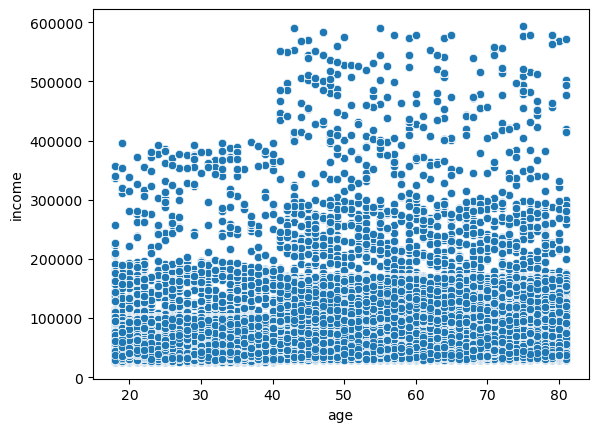

In [29]:
scat = sns.scatterplot(x = 'age', y = 'income',data = df_4)

In [30]:
#Shows support that income goes up up with age but it is very weak. However, the buckets may be to high.

## Export

In [31]:
#Most Spent by Time of Day; Line Chart
line_2.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Most Spent by Time of Day; Line Chart.png'))

In [32]:
#Most Spent by Time of Day; Histogram
busiest_hours.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Most Spent by Time of Day; Histogram.png'))

In [33]:
#Most Spent by Day of Week; Line Chart
line.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Most Spent by Day of Week; Line Chart.png'))

In [34]:
#Age and Income Corrleation; Scatter Chart
scat.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Age and Income Corrleation; Scatter Chart.png'))

In [35]:
#Orders by Day of Week; Bar Chart
bar.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Orders by Day of Week; Bar Chart.png'))

In [36]:
#Orders by Day of Week; Histomgram
hist_1.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Orders by Day of Week; Histomgram.png'))

In [37]:
#Customer Loyalty Breakdown; Bar Chart
customer_loyalty_bar.figure.savefig('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs/Customer Loyalty Breakdown; Bar Chart.png', dpi=300, bbox_inches='tight')

In [38]:
#Age and Number of Dependants Correlation; Line Chart
ep.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Age and Number of Dependants Correlation; Line Chart.png'))